In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Airline Passenger Satisfaction.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18,neutral or dissatisfied,7
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6,neutral or dissatisfied,3
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0,satisfied,9
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9,neutral or dissatisfied,6
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0,satisfied,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,3,2,4,4,5,4,0,0,neutral or dissatisfied,5
129876,129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,5,5,5,5,4,0,0,satisfied,9
129877,129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,4,3,4,5,4,2,0,0,neutral or dissatisfied,5
129878,129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,3,2,5,4,5,4,0,0,satisfied,9


In [3]:
# removing first column (Unnamed:0)

del df[df. columns[0]]

In [4]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18,neutral or dissatisfied,7
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6,neutral or dissatisfied,3
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0,satisfied,9
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9,neutral or dissatisfied,6
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0,satisfied,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,3,2,4,4,5,4,0,0,neutral or dissatisfied,5
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,5,5,5,5,4,0,0,satisfied,9
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,4,3,4,5,4,2,0,0,neutral or dissatisfied,5
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,3,2,5,4,5,4,0,0,satisfied,9


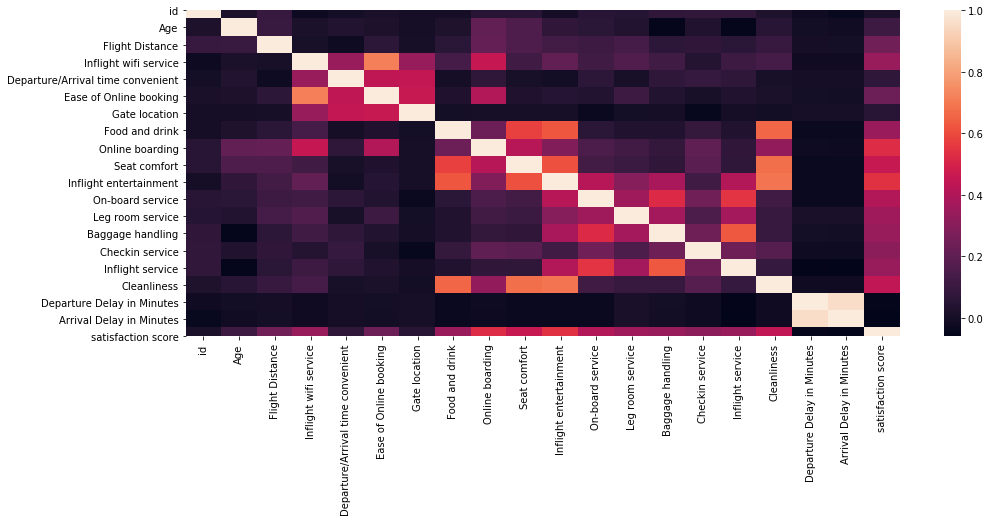

In [5]:
# df heatmap

plt.figure(figsize=(16, 6))
sns.heatmap(df.corr())

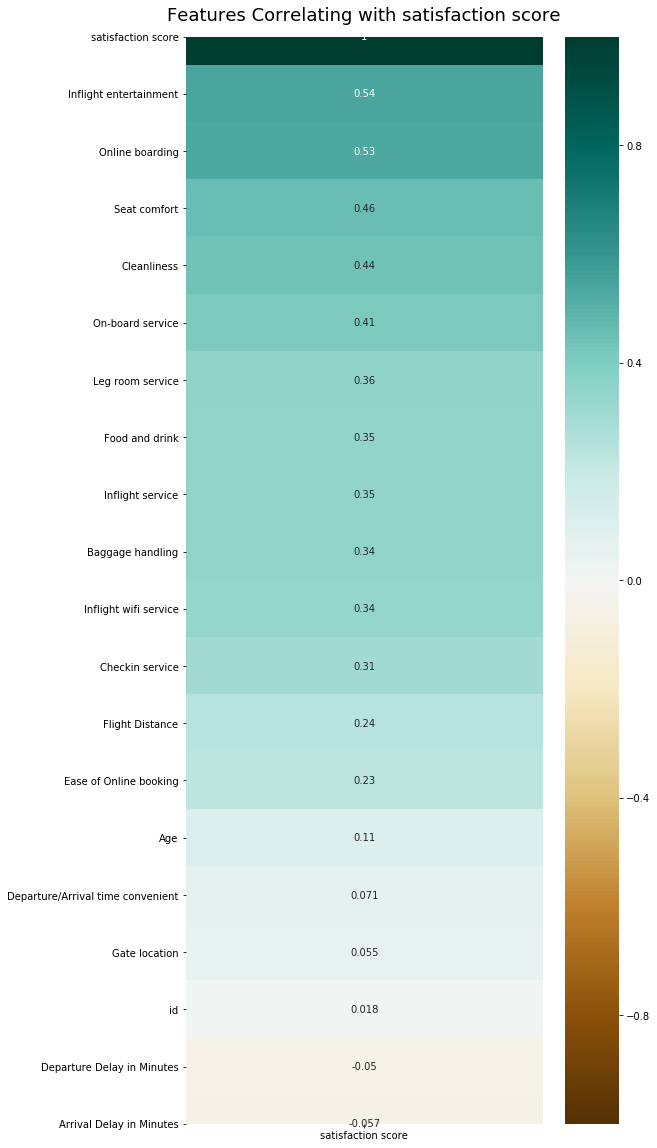

In [6]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(df.corr()[['satisfaction score']].sort_values(by='satisfaction score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with satisfaction score', fontdict={'fontsize':18}, pad=16);

In [7]:
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["satisfaction score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Online boarding           0.531649
Inflight entertainment    0.543923
satisfaction score        1.000000
Name: satisfaction score, dtype: float64

In [8]:
# Check how online boarding and inflight entertainment are correlated with each other

print(df[["Online boarding","Inflight entertainment"]].corr())

                        Online boarding  Inflight entertainment
Online boarding                1.000000                0.283922
Inflight entertainment         0.283922                1.000000


In [9]:
# since they are not highly correlated with each other, we will keep both

In [10]:
# Replace Values in Column
df['customer_type_num'] = ""
df['customer_type_num'] = df['Customer Type'].replace(['Loyal Customer','disloyal Customer'], [1,0])
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction score,customer_type_num
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,3,4,4,5,5,25,18,neutral or dissatisfied,7,1
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,5,3,1,4,1,1,6,neutral or dissatisfied,3,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,3,4,4,4,5,0,0,satisfied,9,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,5,3,1,4,2,11,9,neutral or dissatisfied,6,1
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,4,3,3,3,0,0,satisfied,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,2,4,4,5,4,0,0,neutral or dissatisfied,5,0
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,5,5,5,5,4,0,0,satisfied,9,1
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,3,4,5,4,2,0,0,neutral or dissatisfied,5,1
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,2,5,4,5,4,0,0,satisfied,9,1


In [15]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["customer_type_num"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Age                                  0.284172
Flight Distance                      0.226021
Departure/Arrival time convenient    0.206873
Online boarding                      0.189083
Seat comfort                         0.156239
Inflight entertainment               0.106001
satisfaction score                   0.170509
customer_type_num                    1.000000
Name: customer_type_num, dtype: float64